In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [4]:
# Imports dataframe after already removing outliers (done in "FilFinding_Data2.ipynb")
df = pd.read_csv('/Users/Daniel/Desktop/Research_Projects/NYCCT_Cosmic_Filaments/FilsGalsProperties_stats.csv')
df

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
0,14472,0.11432,4,0.115302,10.5763,0.099281,9.84892,0.173313,0.011573,0.008694,...,3.771253,3.707450,0.0,1.500600e+09,150060.0,NaN,NaN,NaN,NaN,NaN
1,14480,0.20018,4,0.201238,10.3639,0.110768,9.77697,0.200401,0.016244,0.009546,...,7.632137,1.612440,0.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
2,14485,0.18342,5,0.184461,10.8563,0.105653,9.80181,0.187472,0.007964,0.006806,...,6.768023,3.580060,0.0,1.501860e+09,150186.0,NaN,NaN,NaN,NaN,NaN
3,14486,0.19952,4,0.200574,10.7926,0.106621,9.75812,0.204969,0.011286,0.007187,...,7.773001,1.875860,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
4,14487,0.20088,4,0.201935,10.0827,0.107895,9.49168,0.241306,0.012405,0.007280,...,7.868330,1.877050,302971.0,1.502210e+09,150221.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,746914,0.21139,4,0.212345,11.0295,0.091299,9.84517,0.144343,0.008360,0.005882,...,-0.192532,1.660380,307706.0,1.501970e+09,150197.0,NaN,NaN,NaN,NaN,NaN
9908,747326,0.18675,4,0.187759,11.4767,0.106227,9.81439,0.171897,0.010655,0.007496,...,-0.472030,2.081950,300009.0,1.500080e+09,150008.0,NaN,NaN,NaN,NaN,NaN
9909,748601,0.19344,4,0.194463,10.2161,0.107744,9.78807,0.191085,0.009743,0.007355,...,3.620104,0.671291,0.0,1.501450e+09,150145.0,NaN,NaN,NaN,NaN,NaN
9910,748610,0.12744,4,0.128396,10.5102,0.096180,9.85412,0.160613,0.012617,0.008271,...,1.680548,0.087637,300044.0,1.500510e+09,150051.0,NaN,NaN,NaN,NaN,NaN


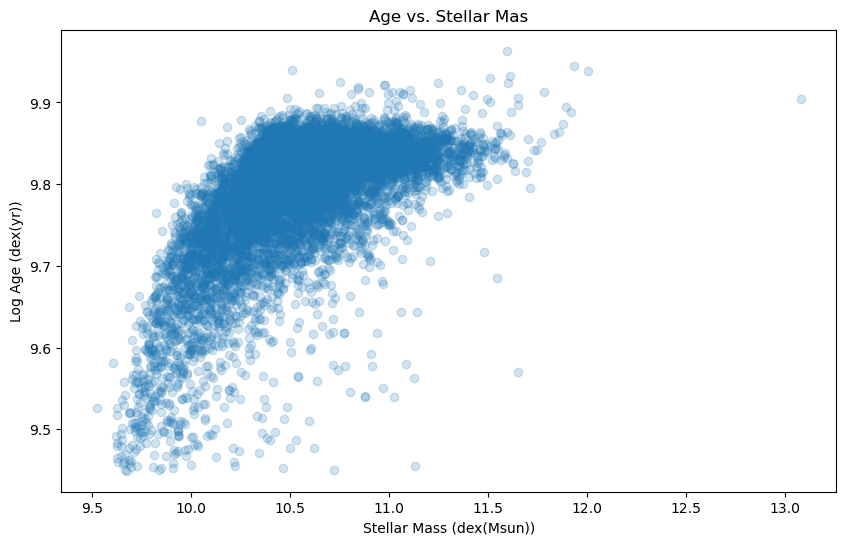

In [5]:
#Scatter Plot with whatever property you want to compare against distance to filament (x-axis)
x = df['d']

y = df['logage']
x2 = df['logmstar']


%matplotlib inline

plt.figure(figsize = (10,6))
plt.scatter(x2,y, alpha = 0.2)
#plt.title('Age vs. Distance to Closest Filament')
plt.title('Age vs. Stellar Mas')
#plt.xlabel('Distance to closest filament (Mpc/h)')
plt.xlabel('Stellar Mass (dex(Msun))')
plt.ylabel('Log Age (dex(yr))')

plt.show()

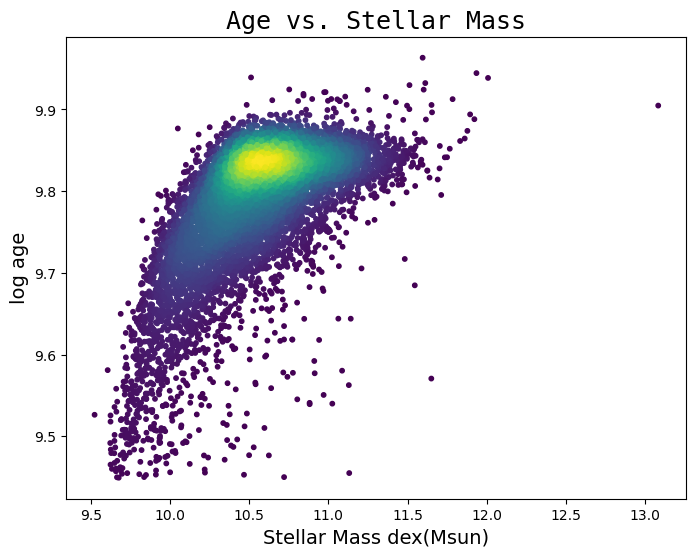

In [7]:
x = df['d']

y = df['logage']
x2 = df['logmstar']

# Calculate the point density
#xy = np.vstack([x,y])
xy = np.vstack([x2,y])
z = gaussian_kde(xy)(xy)


#fig, ax = plt.subplots()
plt.figure(figsize=(8,6))
plt.scatter(x2, y, c=z, s=10)
#plt.colorbar()
## plt.title('Age vs. Distance to Closest Filament', font = 'monospace', fontsize = 18)
plt.title('Age vs. Stellar Mass', font = 'monospace', fontsize = 18)
## plt.xlabel('Distance to closest filament (Mpc/h)', fontsize = 14)
plt.xlabel('Stellar Mass dex(Msun)', fontsize = 14)
plt.ylabel('log age', fontsize = 14)

plt.show()

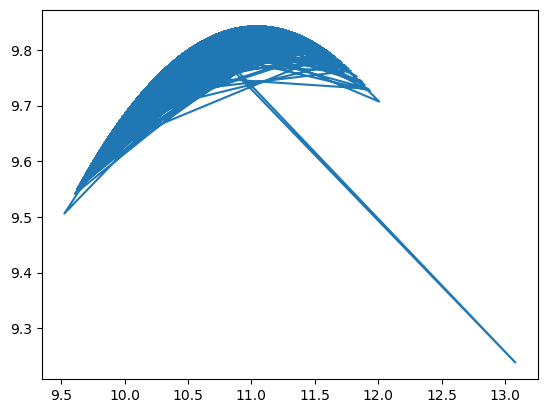

In [12]:
#Scatter Plot with whatever property you want to compare against distance to filament (x-axis)
x = df['logmstar']
y = df['logage']

%matplotlib inline

z = np.polyfit(x, y, 2)
p = np.poly1d(z)

plt.plot(x,p(x))

#plt.figure(figsize = (10,6))
#plt.scatter(x,y, alpha = 0.2)
#plt.title('Age vs. Stellar Mas')
#plt.xlabel('Stellar Mass (dex(Msun))')
#plt.ylabel('Log Age (dex(yr))')

plt.show()